## Vizualizace konvolučních neuronových sítí
Vizualizace konvolučních neuronových sítí (CNN) umožňuje lepší pochopení toho, jak sítě fungují a jak funguje proces učení. Některé z možností vizualizace CNN jsou:
1. Vizualizace vstupních obrázků (po augmentaci) a odpovídajících výstupů sítě.
1. Vizualizace vah jednotlivých filtrů, aby se zjistilo, co se snaží konkrétní filtry naučit rozpoznávat.
1. Vizualizace aktivací jednotlivých filtrů pro identifikaci, co určitý filtr detekuje.
1. Vizualizace gradientů podle vstupních pixelů, aby se zjistilo, které oblasti obrázku jsou nejdůležitější pro správný výstup sítě.


Tyto vizualizace mohou pomoci vylepšit CNN a rozvíjet nové techniky učení, které sítě lépe naučí rozpoznávat a interpretovat data.

Pro zájemce doporučuji online verzi knihy [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/).

### 1. Vstupní natrénovaná sít pro vizualizace

In [1]:
import json
import numpy as np
from PIL import Image
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(pil_im, resize_im=True):
    """
        Processes image for CNNs
    Args:
        PIL_img (PIL_img): PIL Image or numpy array to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (torch variable): Variable that contains processed float tensor
    """
    # Mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    # Ensure or transform incoming image to PIL image
    if type(pil_im) != Image.Image:
        try:
            pil_im = Image.fromarray(pil_im)
        except Exception as e:
            print("could not transform PIL_img to a PIL Image object. Please check input.")

    # Resize image
    if resize_im:
        pil_im = pil_im.resize((224, 224), Image.ANTIALIAS)

    im_as_arr = np.float32(pil_im)
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var

In [3]:
# open image
img_path = 'tiger.jpg'
original_image = Image.open(img_path).convert('RGB')
prep_img = preprocess_image(original_image)

#### Alexnet
[PyTorch hub](https://pytorch.org/hub/pytorch_vision_alexnet/) obsahuje mnoho modelů s natrénovaných na velkých datasetech. Natrénované váhy je možné použít k predikci či jako starting point pro vaše trénovaní.

Alexnet v roce 2012 vyhrála ImageNEt challenge, ostatní řešení předčila o +10% v hodnotící metrice, především díky zvýšení efektivity výpočtů za pomoci GPU.

#### ImageNet
Velký dataset anotovaných obrázků, >14mil obrázků. Anotace nejdříve pro klasifikaci, později i pro detekci objektů (+bouding boxz). Třídy řazeny i hirearchicky.
![image](https://devopedia.org/images/article/172/7316.1561043304.png)

In [4]:
# Alexnet
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /home/martin/.cache/torch/hub/pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
# Open ImageNet classes JSON file
imagenet_json = 'imagenet_class_index.json'
with open(imagenet_json, 'r') as f:
    data = json.load(f)

# Create a dictionary with the class IDs and labels
imagenet_classes = {}
for key, value in data.items():
    imagenet_classes[int(key)] = value[1]

# Print the dictionary
print(imagenet_classes)

{0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake', 54: 'hogn

In [6]:
# Inference
out = model(prep_img)

# Klasifikuje načtěný obrázek
Načtený obrazek byl spravne klasifikován jako 'tiger' s id = 292

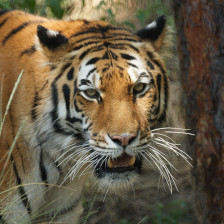

Predicted class index: 292
Predicted class name: tiger
Confidence score: 0.688


In [7]:
# Zobraz vstupní obrázek
display(original_image)

# Vypiš třídu predikovanou modelem, zobraz její index, název a hodnotu vrácenou sítí.
predicted_idx = torch.argmax(out).item()
class_name = imagenet_classes[predicted_idx]
print(f"Predicted class index: {predicted_idx}")
print(f"Predicted class name: {class_name}")
print(f"Confidence score: {torch.nn.functional.softmax(out, dim=1)[0][predicted_idx].item():.3f}")

### 2. Vizualizace gradientů podle vstupních pixelů

In [8]:
# pomocna funkce pro export vystupu
def format_np_output(np_arr):
    """
        This is a (kind of) bandaid fix to streamline saving procedure.
        It converts all the outputs to the same format which is 3xWxH
        with using sucecssive if clauses.
    Args:
        im_as_arr (Numpy array): Matrix of shape 1xWxH or WxH or 3xWxH
    """
    # Phase/Case 1: The np arr only has 2 dimensions
    # Result: Add a dimension at the beginning
    if len(np_arr.shape) == 2:
        np_arr = np.expand_dims(np_arr, axis=0)
    # Phase/Case 2: Np arr has only 1 channel (assuming first dim is channel)
    # Result: Repeat first channel and convert 1xWxH to 3xWxH
    if np_arr.shape[0] == 1:
        np_arr = np.repeat(np_arr, 3, axis=0)
    # Phase/Case 3: Np arr is of shape 3xWxH
    # Result: Convert it to WxHx3 in order to make it saveable by PIL
    if np_arr.shape[0] == 3:
        np_arr = np_arr.transpose(1, 2, 0)
    # Phase/Case 4: NP arr is normalized between 0-1
    # Result: Multiply with 255 and change type to make it saveable by PIL
    if np.max(np_arr) <= 1:
        np_arr = (np_arr*255).astype(np.uint8)
    return np_arr

#### 2.1 Vanilla backpropagation
Myšlenka Vanilla Gradientu byla představena [Simonyanem et al. (2013)](https://arxiv.org/abs/1312.6034) jako jedna z prvních přístupů pro určení/vizualizaci příspěvku jednotlivých pixelů vstupního obrazu. Je poměrně jednoduchá, pokud již znáte backpropagation. (Svůj přístup pojmenovali "Image-Specific Class Saliency - neboli Salience třídy specifická pro obraz", ale název Vanilla Gradient se mi líbí více.) Počítá gradient kriteriální funkce (loss function) pro vybranou třídu vzhledem k vstupním pixelům. Výsledkem je mapa velikosti vstupního obrázku s negativními a pozitivními hodnotami.

Postup je následující:
1. Prohnat obrázek sítí.
1. Spočítat gradient $E_{grad}(I_0)$ pro vybranou třídu zpět až k vstupním pixelům:
$$
E_{grad}(I_0)=\frac{δS_c}{δI}|I=I_0
$$
   Máme tedy obraz $I$ a konvoluční neuronová síť mu přiřazuje skóre $S_c(I)$ pro třídu $c$. Všechny ostatní třídy nastavíme na nulu.
1. Vizualizovat gradienty. Můžeme zobrazit absolutní hodnoty nebo zvlášť zvýraznit negativní a pozitivní hodnoty.

Vzorec pro výpočet pozitivní saliency mapy:
$$
S_c^+(I) =\frac{\max(E_{grad}(I_0), 0)}{\max(E_{grad}(I_0))}
$$
tedy záporné hodnoty gradientu $E_{grad}(I_0)$ nastavíme na nulu a následně vydělíme (normalizujeme) maximální hodnotou z gradientu $E_{grad}(I_0)$.

Vzorec pro výpočet negativní saliency mapy:
$$
S_c^-(I) = \frac{\min(E_{grad}(I_0), 0)}{\min(E_{grad}(I_0))}
$$
tedy kladné hodnoty nastavíme na 0 a následně vydělíme nejnižší hodnotou z $E_{grad}(I_0)$.

In [9]:
class VanillaBackprop():
    """
        Produces gradients generated with vanilla back propagation from the image
    """
    def __init__(self, model):
        self.model = model
        self.gradients_vanilla = None
        # Put model in evaluation mode
        self.model.eval()
        # Hook the first layer to get the gradient
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients_vanilla = grad_in[0]

        # Register hook to the first layer
        first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def generate_gradients(self, input_image, target_class):
        # Forward
        model_output = self.model(input_image)
        # Zero grads
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first batch channel (1,3,224,224)
        gradients_as_arr = self.gradients_vanilla.data.numpy()[0]
        
        # Vypočítání pozitivní a negativní saliency mapy
        pos_saliency = np.maximum(0, gradients_as_arr)
        neg_saliency = np.maximum(0, -gradients_as_arr)
        # Normalizace saliency map mezi 0 a 1
        pos_saliency = (pos_saliency - np.min(pos_saliency)) / (np.max(pos_saliency) - np.min(pos_saliency))
        neg_saliency = (neg_saliency - np.min(neg_saliency)) / (np.max(neg_saliency) - np.min(neg_saliency))

        return gradients_as_arr, pos_saliency, neg_saliency
    
    def generate_smooth_grad(self, input_image, target_class, stdev_spread=0.15, n_samples=25, magnitude=True):
        """
        Vygeneruje smooth grad daného modelu pro daný obrázek a cílovou třídu

        Args:
        - input_image: Vstupni obrazek
        - target_class: Cilova trida
        - stdev_spread: Smerodatna odchylka sumu
        - n_samples: Pocet vzorku, ktere se maji prumerovat
        - magnitude: Pokud je True, vrati magnitudu gradientu
        """
        # Vytvori pole 0 pro celkoveho gradientu
        total_gradients = torch.zeros_like(input_image)

        # Vygeneruje zasumeny obrazk a pro kazdy vypocita gradient (* n_samples)
        for i in range(n_samples):
            # Prida sum
            noise = torch.randn_like(input_image) * stdev_spread * (input_image.max() - input_image.min())
            noisy_image = input_image + noise

            # Vypocita gradient pro obrazek se sumem
            gradients, _, _ = self.generate_gradients(noisy_image, target_class)

            # Pricte gradient
            total_gradients += gradients

        # Vypocita prumer ze vsech gradientu
        avg_gradients = total_gradients / n_samples

        # Ziska magnitudu gradientu
        if magnitude:
            avg_gradients = avg_gradients.abs()

        # Prevede PyTorch tensor na numpy array
        smooth_grad = avg_gradients.detach().cpu().numpy()

        return smooth_grad

# Pozitivní a negativní saliency mapa pro Vanilla

/home/martin/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Positive saliency map


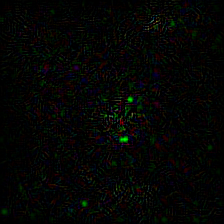

Negative saliency map


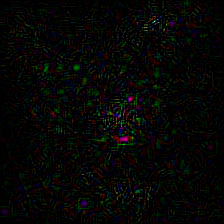

In [10]:
# zvolit index tridy, ktery nas zajima 
target_class = 292

# Vanilla backprop
VBP = VanillaBackprop(model)

# zavolat funkci function VBP.generate_gradients
_, pos_saliency_vbp, neg_saliency_vbp = VBP.generate_gradients(prep_img, target_class)

# s pouzitim funkce format_np_output a Image.fromarray formatuj vystup jako RGB obrazek a zobraz
rgb_pos_saliency_vbp = format_np_output(pos_saliency_vbp)
rgb_pos_saliency_vbp = Image.fromarray(rgb_pos_saliency_vbp)
print("Positive saliency map")
display(rgb_pos_saliency_vbp)

rgb_neg_saliency_vbp = format_np_output(neg_saliency_vbp)
rgb_neg_saliency_vbp = Image.fromarray(rgb_neg_saliency_vbp)
print("Negative saliency map")
display(rgb_neg_saliency_vbp)

## Smooth Grad pro Vanilla

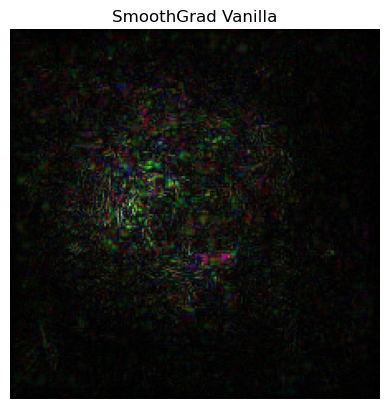

In [11]:
smooth_grad_vbp = VBP.generate_smooth_grad(prep_img, target_class)

# odstani batch + transpozice
image = smooth_grad_vbp.squeeze().transpose(1, 2, 0)
# normalizace
image = (image - image.min()) / (image.max() - image.min())
# zobrazi smooth grad
plt.imshow(image)
plt.title("SmoothGrad Vanilla")
plt.axis('off')
plt.show()

#### 2.2 Guided gradient backpropagation
Vanilla Gradient má problém se saturací, jak vysvětlují [Avanti et al. (2017)](https://arxiv.org/abs/1704.02685). Pokud se v síti používá ReLU a pokud aktivace klesne pod nulu, aktivace je oříznuta na nulu a již se nemění. Aktivace je tak saturovaná.

Ukažme si to na příkladu: Vstup do vrstvy jsou dva neurony s váhami $-1$ a $-1$ a s biasem $1$. Při průchodu vrstvou ReLU bude aktivace $neuron1 + neuron2$, pokud je součet obou neuronů $<1$. Pokud je součet $>1$, aktivace zůstane saturovaná na hodnotě $1$. Gradient v tomto bodě bude také nulový a Vanilla Gradient bude tvrdit, že tento neuron není důležitý.

Guided gradient se tento problém snaží vyřešit či alespoň zmírnit.

In [12]:
from torch.nn import ReLU
class GuidedBackprop():
    """
       Produces gradients generated with guided back propagation from the given image
    """
    def __init__(self, model):
        self.model = model
        self.gradients_guided = None
        self.forward_relu_outputs = []
        # Put model in evaluation mode
        self.model.eval()
        self.update_relus()
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients_guided = grad_in[0]
        # Register hook to the first layer
        first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def update_relus(self):
        """
            Updates relu activation functions so that
                1- stores output in forward pass
                2- imputes zero for gradient values that are less than zero
        """
        def relu_backward_hook_function(module, grad_in, grad_out):
            """
            If there is a negative gradient, change it to zero
            """
            # Get last forward output
            corresponding_forward_output = self.forward_relu_outputs[-1]
            corresponding_forward_output[corresponding_forward_output > 0] = 1
            modified_grad_out = corresponding_forward_output * torch.clamp(grad_in[0], min=0.0)
            del self.forward_relu_outputs[-1]  # Remove last forward output
            return (modified_grad_out,)

        def relu_forward_hook_function(module, ten_in, ten_out):
            """
            Store results of forward pass
            """
            self.forward_relu_outputs.append(ten_out)

        # Loop through layers, hook up ReLUs
        for pos, module in self.model.features._modules.items():
            if isinstance(module, ReLU):
                module.register_backward_hook(relu_backward_hook_function)
                module.register_forward_hook(relu_forward_hook_function)

    def generate_gradients(self, input_image, target_class):
        # Forward pass
        model_output = self.model(input_image)
        # Zero gradients
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first channel (1,3,224,224)
        gradients_as_arr = self.gradients_guided.data.numpy()[0]

        # Vypočítání pozitivní a negativní saliency mapy
        pos_saliency = np.maximum(0, gradients_as_arr)
        neg_saliency = np.maximum(0, -gradients_as_arr)
        # Normalizace saliency map mezi 0 a 1
        pos_saliency = (pos_saliency - np.min(pos_saliency)) / (np.max(pos_saliency) - np.min(pos_saliency))
        neg_saliency = (neg_saliency - np.min(neg_saliency)) / (np.max(neg_saliency) - np.min(neg_saliency))

        return gradients_as_arr, pos_saliency, neg_saliency
    
    def generate_smooth_grad(self, input_image, target_class, stdev_spread=0.2, n_samples=25, magnitude=True):
        """
        Vygeneruje smooth grad daného modelu pro daný obrázek a cílovou třídu

        Args:
        - input_image: Vstupni obrazek
        - target_class: Cilova trida
        - stdev_spread: Smerodatna odchylka sumu
        - n_samples: Pocet vzorku, ktere se maji prumerovat
        - magnitude: Pokud je True, vrati magnitudu gradientu
        """
        # Vytvori pole 0 pro celkoveho gradientu
        total_gradients = torch.zeros_like(input_image)

        # Vygeneruje zasumeny obrazk a pro kazdy vypocita gradient (* n_samples)
        for i in range(n_samples):
            # Prida sum
            noise = torch.randn_like(input_image) * stdev_spread * (input_image.max() - input_image.min())
            noisy_image = input_image + noise

            # Vypocita gradient pro obrazek se sumem
            gradients, _, _ = self.generate_gradients(noisy_image, target_class)

            # Pricte gradient
            total_gradients += gradients

        # Vypocita prumer ze vsech gradientu
        avg_gradients = total_gradients / n_samples

        # Ziska magnitudu gradientu
        if magnitude:
            avg_gradients = avg_gradients.abs()

        # Prevede PyTorch tensor na numpy array
        smooth_grad = avg_gradients.detach().cpu().numpy()

        return smooth_grad

# Pozitivní a negativní saliency mapa pro Guided
Je možné vidět, že vyrazněji více podobá vstupímu obrazku než tomu bylo u Vanilla

Positive saliency map


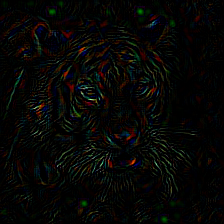

Negative saliency map


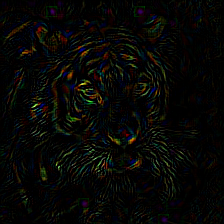

In [13]:
# zvolit index tridy, ktery nas zajima 
target_class = 292

# Guided backprop
GBP = GuidedBackprop(model)

# zavolat funkci function GBP.generate_gradients
_, pos_saliency_gbp, neg_saliency_gbp = GBP.generate_gradients(prep_img, target_class)

# s pouzitim funkce format_np_output a Image.fromarray formatuj vystup jako RGB obrazek a zobraz
rgb_pos_saliency_gbp = format_np_output(pos_saliency_gbp)
rgb_pos_saliency_gbp = Image.fromarray(rgb_pos_saliency_gbp)
print("Positive saliency map")
display(rgb_pos_saliency_gbp)

rgb_neg_saliency_gbp = format_np_output(neg_saliency_gbp)
rgb_neg_saliency_gbp = Image.fromarray(rgb_neg_saliency_gbp)
print("Negative saliency map")
display(rgb_neg_saliency_gbp)

## Smooth Grad pro Guided

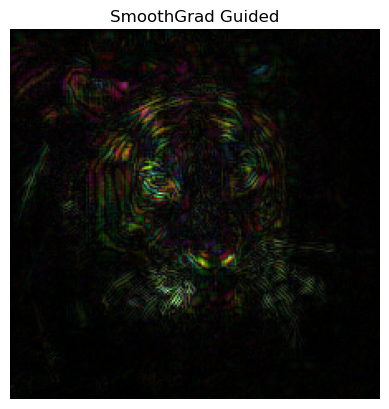

In [14]:
smooth_grad_gbp = GBP.generate_smooth_grad(prep_img, target_class)

# odstani batch + transpozice
image = smooth_grad_gbp.squeeze().transpose(1, 2, 0)
# normalizace
image = (image - image.min()) / (image.max() - image.min())
# zobrazi smooth grad
plt.imshow(image)
plt.title("SmoothGrad Guided")
plt.axis('off')
plt.show()

#### 2.3 Aktivační mapa třídy Grad-CAM 
Grad-CAM je z kráceno z anglického Gradient-weighted Class Activation Map (volně přeloženo, gradientem vážená aktivační mapa jednotlivých tříd). Grad-CAM se snaží podložit rozhodování CNN vizualizací. Narozdíl od předchozích metod není gradient propagován až na začátek ke vstupu, ale (většinou) pouze po poslední konvoluční vrstvu sítě. Tím se snaží vizualizovat hrubou lokalizační mapu označující významné části vstupního obrazu pro dané rozhodnutí (neboli určení dané třídy).

In [15]:
import torch.nn.functional as F
class CamExtractor():
    """
        Extracts cam features from the model
    """
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

    def forward_pass_on_convolutions(self, x):
        """
            Does a forward pass on convolutions, hooks the function at given layer
        """
        conv_output = None
        for module_pos, module in self.model.features._modules.items():
            x = module(x)  # Forward
            if int(module_pos) == self.target_layer:
                conv_output = x  # Save the convolution output on that layer
        return conv_output, x

    def forward_pass(self, x):
        """
            Does a full forward pass on the model
        """
        # Forward pass on the convolutions
        conv_output, x = self.forward_pass_on_convolutions(x)
        x = x.view(x.size(0), -1)  # Flatten
        # Forward pass on the classifier
        x = self.model.classifier(x)
        return conv_output, x


class ScoreCam():
    """
        Produces class activation map
    """
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        # Define extractor
        self.extractor = CamExtractor(self.model, target_layer)

    def generate_cam(self, input_image, target_class=None):
        # Full forward pass
        # conv_output is the output of convolutions at specified layer
        # model_output is the final output of the model (1, 1000)
        conv_output, model_output = self.extractor.forward_pass(input_image)
        if target_class is None:
            target_class = np.argmax(model_output.data.numpy())
        # Get convolution outputs
        target = conv_output[0]
        # Create empty numpy array for cam
        cam = np.ones(target.shape[1:], dtype=np.float32)
        # Multiply each weight with its conv output and then, sum
        for i in range(len(target)):
            # Unsqueeze to 4D
            saliency_map = torch.unsqueeze(torch.unsqueeze(target[i, :, :],0),0)
            # Upsampling to input size
            saliency_map = F.interpolate(saliency_map, size=(224, 224), mode='bilinear', align_corners=False)
            if saliency_map.max() == saliency_map.min():
                continue
            # Scale between 0-1
            norm_saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())
            # Get the target score
            w = F.softmax(self.extractor.forward_pass(input_image*norm_saliency_map)[1],dim=1)[0][target_class]
            cam += w.data.numpy() * target[i, :, :].data.numpy()
        cam = np.maximum(cam, 0)
        cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))  # Normalize between 0-1
        cam = np.uint8(cam * 255)  # Scale between 0-255 to visualize
        cam = np.uint8(Image.fromarray(cam).resize((input_image.shape[2],
                       input_image.shape[3]), Image.ANTIALIAS))/255
        return cam

In [16]:
import copy
import matplotlib.cm as mpl_color_map
def apply_colormap_on_image(org_im, activation, colormap_name):
    """
        Apply heatmap on image
    Args:
        org_img (PIL img): Original image
        activation_map (numpy arr): Activation map (grayscale) 0-255
        colormap_name (str): Name of the colormap
    """
    # Get colormap
    color_map = mpl_color_map.get_cmap(colormap_name)
    no_trans_heatmap = color_map(activation)
    # Change alpha channel in colormap to make sure original image is displayed
    heatmap = copy.copy(no_trans_heatmap)
    heatmap[:, :, 3] = 0.4
    heatmap = Image.fromarray((heatmap*255).astype(np.uint8))
    no_trans_heatmap = Image.fromarray((no_trans_heatmap*255).astype(np.uint8))

    # Apply heatmap on image
    heatmap_on_image = Image.new("RGBA", org_im.size)
    heatmap_on_image = Image.alpha_composite(heatmap_on_image, org_im.convert('RGBA'))
    heatmap_on_image = Image.alpha_composite(heatmap_on_image, heatmap)
    return no_trans_heatmap, heatmap_on_image

## Načte další obrázek kočka a pes

Nejdříve načte obrázek psa a kočky a ten pak zobrazi. Následně je v obrazku pomocí CNN detekováno top 5 tříd a jsou vypsány jejich ID a názvy.

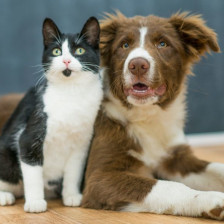

TOP 5 detekovanych trid v obrazku:

232: Border_collie
173: Ibizan_hound
231: collie
230: Shetland_sheepdog
285: Egyptian_cat


In [17]:
# otevre dalsi obrazek: dog & cat
img_path_2 = 'dogandcat.jpeg'
original_image_2 = Image.open(img_path_2).convert('RGB')
prep_img_2 = preprocess_image(original_image_2)

# povodni obrazek
display(original_image_2)

# top 5 detekovanych trid v obrazku 
model_output = model(prep_img_2)
probs, ids = torch.topk(model_output, k=5)

# vypis top 5 trid
print("TOP 5 detekovanych trid v obrazku:\n")
for id in ids[0]:
    print("%d: %s" % (id.item(), imagenet_classes[id.item()]))

## Aktivační mapa Grad-CAM pro prvních 5 detekovaných tříd v obrázku

V obrázku 'dogandcat.jpeg' býli mezi prvními 5 detekovanými třídami (Border_collie, Ibizan_hound, collie, Shetland_sheepdog, Egyptian_cat). Pro tyto jednotlivé třídy jsou zde vykresleny jejich Grad-CAM mapy, na kterých je možné vidět jaké místa obrazku nejvíce přispívají pro určení dané třídy. Třída s nejvyšší pravdepodobností se nachází úplně v levo a tou je 'Border_collie' a to odpovída. Nasledně zde byli ještě 3 další třídy s nižší pravděpodovností určující o jake plemeno psa jde. Třída s nejnižší pravdepodobností zde byla 'Egyptian_cat'. U ní je z Grad-CAM mapy vidět, že je nejvýraznější v místě kde se nachází kočka. Model správně určil, že jde o kočku, ale dle mého názoru nejde přesně o plemeno Egyptské kočky. Třida 'Shetland_sheepdog' má Grad-CAM mapu jako jedinou rozdělenou na "dvě části", kdy ta větší se nacházi v místě kde má kočka hlavu a ta druha kde ma pes ucho, ve vysledku tedy jde o něpřesnou klasifikaci pro tuto třídu. To však není nutné prad v uváhu jelikož už jde o třídu s nižší pravděpodobností.

In [18]:
target_layer = 10 # posledni konvolucni vrstva AlexNet

# Score cam
score_cam = ScoreCam(model, target_layer)

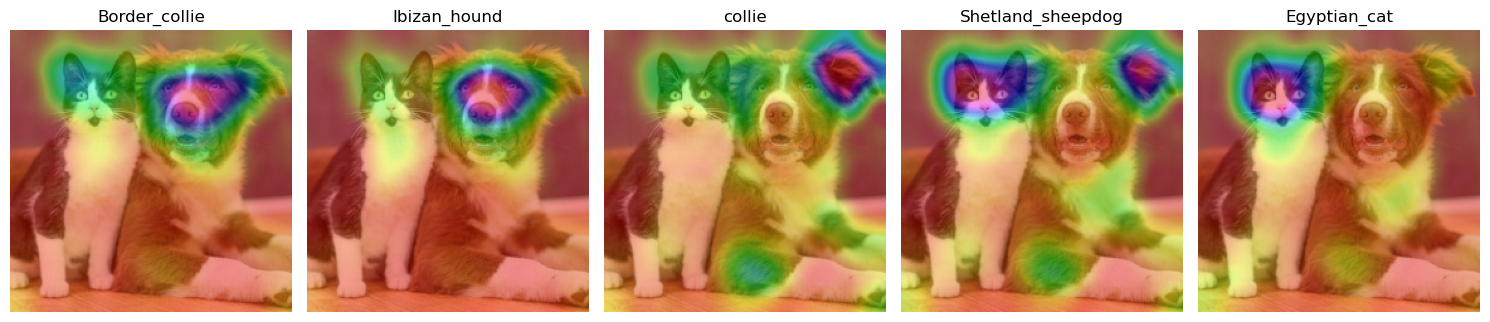

In [19]:
# Figure pro zobrazíme aktivační mapu vedle sebe
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))


for i, id in enumerate(ids[0]):
    target_class = id.item()  # id tridy

    # Vygeneruje aktivacni mapu pro danou tridu (target_class)
    cam = score_cam.generate_cam(prep_img_2, target_class=target_class)

    # cam ze ScoreCam vizualizovano jako barevna heat mapa na vstupním obraze
    _, heatmap_on_image = apply_colormap_on_image(original_image_2, cam, 'hsv')

    # Zobrazi aktivacni mapu
    ax[i].imshow(heatmap_on_image, cmap='jet')
    ax[i].axis('off')
    ax[i].set_title(imagenet_classes[target_class])

plt.tight_layout()
plt.show()


### Úkol - cnn vizualizace
Rozšiřte kód tohoto jupyter notebooku o následující: 
1. Z vypočtených gradientů (Vanilla i Guided) zobrazte pozitivní a negativní saliency mapy. Výstupy opatřete popisky. (2b)
1. Proveďte Smooth Grad u obou metod vizualizace gradientů (Vanilla i Guided). (4b)
1. Zobrazte aktivační mapu Grad-CAM pro prvních 5 detekovaných tříd v obrázku dogandcat.jpeg s popisky (torch.topk). Okomentujte. (2b)

Projděte si jupyter notebook na stránce [pytorch-deepdream](https://github.com/gordicaleksa/pytorch-deepdream). Za pomoci kódu v repozitáři vygenerujte dva vizuálně zajímavé obrázky (odlišné od ukázkových příkladů). Ke každému z obrázků uveďte jaký model natrénovaný na jakém datasetu jste použili, kterou vrstvu a kolik iterací jste aplikovali a další parametry. A to ve formě configu nebo přesného příkazu/části kódu použitého při tvorbě obrázku, viz část jupytenotebooku se lvem. (2b)